In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import sys
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import configparser
sys.path.insert(0, 'Utils/')

from AISDataManager import AISDataManager
import SimpleUtils as sU
import Constants as c
import TimeUtils as timeUtils
import datetime
import matplotlib.animation as animation
from IPython.display import HTML

aISDM = AISDataManager()

In [3]:
srcDir = "/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/"
trackLenDesFile = "/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/TrackLen_1004.csv"
trackLenDF,_ = aISDM.load_data_from_csv(trackLenDesFile)

In [4]:
lonMin = -122.00
lonMax = -118.50
latMin = 33.40
latMax = 36.40
gridSize = 0.01

yearList = [ \
        2015 \
        , 2016 \
        , 2017 \
        , 2018 \
        , 2019 \
]

monList = [ \
    1 \
    , 2 \
    , 3 \
    , 4 \
    , 5 \
    , 6 \
    , 7 \
    , 8 \
    , 9 \
    , 10 \
    , 11 \
    , 12 \
]

In [5]:
hMNumColmn = int(np.floor((lonMax - lonMin)/gridSize))
hMNumRows = int(np.floor((latMax - latMin)/gridSize))
print(hMNumRows, hMNumColmn)
print(hMNumRows*hMNumColmn)

300 350
105000


In [6]:
hMArr = []
for year in yearList[0:]:
    for mon in monList[0:]:
        monthTraj = trackLenDF[(trackLenDF['TRAJ_MON']==mon) & (trackLenDF['TRAJ_YEAR']==year)]
        print(monthTraj.shape)
        mMSIColmn = monthTraj.columns.tolist().index('MMSI')
        trajNumColmn = monthTraj.columns.tolist().index('TRAJ_NUM')
        #now iterate through every trajectory
        tempHM = np.zeros((hMNumRows, hMNumColmn))
        print(tempHM.shape)
        for i in range(0,monthTraj.shape[0]):
            trajFile = srcDir + str(monthTraj.iloc[i,mMSIColmn]) + '_' + str(monthTraj.iloc[i,trajNumColmn]) + '.csv'
            print(trajFile)
            singleTrajData,_ = aISDM.load_data_from_csv(trajFile)
            lonArr = singleTrajData['LON'] - lonMin
            lonArr = np.floor(lonArr/gridSize)
            lonArr = lonArr.astype(int)
            
            latArr = singleTrajData['LAT'] - latMin
            latArr = np.floor(latArr/gridSize)
            latArr = latArr.astype(int)
        
            tempHM[latArr,lonArr] = tempHM[latArr,lonArr] + 1
        hMArr.append(tempHM.copy())    

(391, 8)
(300, 350)
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355395000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477257100_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355754000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355754000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353495000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353495000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366629000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477065200_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477076500_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4771

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016200_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000080_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311016100_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092489_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092489_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092489_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2296

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566483000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566441000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566441000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566441000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566441000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566410000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566410000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566704000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5667

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371799000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371799000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371820000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371820000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371836000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371851000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371851000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3720

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016434_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016434_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016423_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016423_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016420_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016420_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016305_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016436_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3053

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006096_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006096_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005979_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477441400_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477397800_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477397800_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4773

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477276600_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353428000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352492000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352408000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352408000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352408000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352542000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4773

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371323000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371111000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477143900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477143900_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4771

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015020_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014956_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351684000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351687000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351687000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351135000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563119000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564933000_2.csv
(399, 8)
(300, 350)
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477242400_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211331640_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211331640_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370289000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370508000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370508000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369989000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2095

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014410_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014410_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014996_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014792_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014792_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000158_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3110

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351400_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351400_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477857000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477795300_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477790500_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477950300_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477950300_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477950300_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4779

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352804000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352804000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3531

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371111000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371111000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/209786000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/209786000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/36

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015819_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311018600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311018600_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311018600_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015992_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015871_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015871_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015871_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003100_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477397800_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477397800_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390400_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477390300_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477463200_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351552000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351552000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351687000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351687000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564995000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564995000_1.csv
(470, 8)
(300, 350)
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477271300_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355446000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477257100_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477257100_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477257100_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355813000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355813000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368473000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368473000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368473000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369326000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3692

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311918000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311918000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311918000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015627_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003521_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005152_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005152_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538090414_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006278_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005971_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005971_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005971_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005938_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566999000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566999000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566999000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566961000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566956000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566956000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566974000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566974000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5669

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210161000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373035000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372609000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372609000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372609000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372736000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/37

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357737000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357737000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477050700_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477050700_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413159000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413159000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413161000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/41

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229993000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235059376_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235059376_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235059376_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092192_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093618_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093618_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235069238_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235076681_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2350

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477950300_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477950300_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904700_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904700_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477744600_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352444000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353889000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353889000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353889000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352407000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3524

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371487000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371487000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371349000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370894000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370959000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371060000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371111000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/37

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016424_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016420_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305346000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305824000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305855000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305905000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305905000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309509000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/63

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/236111885_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/236111885_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/236111885_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091857_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091802_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091802_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091802_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/236111837_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/236111837_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/236111837_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2351

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009672_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636009672_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012808_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636012422_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566922000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353968000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353968000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372367000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372400000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416482000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374792000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374792000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374617000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374617000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432930000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432930000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477003800_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477003800_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220397000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220397000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220397000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220593000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220598000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220598000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566267000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566267000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566267000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566267000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566267000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566267000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566389000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566389000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5663

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352018000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355234000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354212000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357737000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357737000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357737000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357437000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357437000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357437000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357437000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357437000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357437000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367070510_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3670

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015020_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015020_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015020_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309656000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016096_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016096_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016096_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015993_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003008_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003008_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003008_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/548899000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005564_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005564_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005246_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005246_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563991000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368680000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368684000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309253000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309253000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016326_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016326_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016326_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016436_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3083

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006535_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538071031_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005733_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005733_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477961600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477454900_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4774

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353248000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353248000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352283000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352355000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371443000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371443000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371559000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257429000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257429000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257429000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256930000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256940000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256940000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257366000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257366000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2580

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235103287_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235114033_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235114033_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091083_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091307_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091349_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091473_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091473_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563858000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563831000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564397000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/564442000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563758000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563079000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563610000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563610000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563610000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563584000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372989000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372955000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372955000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372955000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372955000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372827000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370289000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016423_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016436_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090534_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247009600_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247009600_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012900_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012900_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012900_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/247012900_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249806000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249966000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566300000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566300000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372491000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372491000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372516000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372516000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372516000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371799000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374353000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441628000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441628000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431221000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431221000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/215381000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229452000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477685200_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477685200_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477719000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477699600_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477699600_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372308000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371752000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371752000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371961000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372056000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372056000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372548000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/21

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477003800_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477003800_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477003800_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014800_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431190000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431190000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431190000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431221000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431221000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/43

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092391_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229792000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229952000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229969000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229993000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092366_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235090622_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477790500_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477790500_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477904300_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655900_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352879000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352879000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352879000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356798000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353156000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353109000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353109000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352631000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366563000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477198000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366479000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013689_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015110_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015994_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015994_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000317_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309841000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015819_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015709_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/63

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477947100_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477942900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477655200_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477593600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352031000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352031000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354203000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354202000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354415000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416509000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374077000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477020100_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431296000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431314000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431315000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220397000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220415000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220415000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090534_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477637600_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477617400_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477593600_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738200_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477699600_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352196000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353968000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353968000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354405000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354405000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354405000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353934000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357737000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357405000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477222600_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477222600_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367070510_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416467000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229993000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080187_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235080906_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235082896_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235082896_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220129000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220129000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351126000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477346500_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477346500_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_149.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_150.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_151.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_152.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_153.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352542000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353248000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353332000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353698000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353698000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371111000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366576000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/259895000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266210000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266210000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266338000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/258964000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015496_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311045300_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311045300_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015604_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015604_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6360

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_55.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_56.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_57.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211335760_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211335760_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004007_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004007_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005057_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004601_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006850_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566879000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319740000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566794000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566794000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566735000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211693000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566950000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566952000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/210242000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372995000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372995000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372829000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372829000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370150000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370150000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370458000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432433000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432433000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432722000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432440000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351733000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351733000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_65.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_66.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_66.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220415000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220415000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220594000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220596000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248435000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248435000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/248435000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636090764_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249174000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_166.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_167.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_168.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_169.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477315000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353332000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353873000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353729000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353729000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353619000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352586000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352586000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352948000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477192900_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366629000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366791000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477065200_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477065200_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477105200_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477107200_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013698_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013695_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015110_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015110_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015020_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003817_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003810_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003648_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006708_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006708_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007063_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007063_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005888_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005888_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005888_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/4

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563220000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563417000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563417000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563324000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565048000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565043000_9.csv
(481, 8)
(300, 350)
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356005000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356005000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356005000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369463000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368685000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370869000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308599000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309108000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309108000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016436_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016436_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016436_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016437_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016437_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805889_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249819000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805888_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805888_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/253406000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805590_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805625_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/25

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356872000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372336000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372367000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372367000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372399000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372399000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416490000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416491000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416509000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373816000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/440202000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/440202000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014700_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014800_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014800_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014800_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235084298_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235084298_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235093619_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235078078_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235077448_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218284000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218284000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477462400_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477522000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477519400_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351690000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351690000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477351100_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477346500_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355575000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355999000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355999000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356181000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355981000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353295000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353288000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366792000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477135600_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477135600_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117900_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117900_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477056400_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013821_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000188_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000188_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016206_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016206_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016206_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016168_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311013600_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004086_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003981_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003947_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003886_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538005113_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003729_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006859_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006535_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006535_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538007194_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5380

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563105000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563105000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563077000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563573000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563573000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563573000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563417000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563417000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563324000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563324000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/56

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369247000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368916000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368916000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368836000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368686000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370777000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370777000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015228_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_52.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_53.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_54.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311057300_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015659_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013695_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013695_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013692_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092021_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092021_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092020_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091083_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091083_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091083_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565671000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565819000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/576327000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011280_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413173000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372296000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372319000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367438000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371862000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371862000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372052000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014800_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477023400_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477023400_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477027500_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431265000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431296000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431296000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431332000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220206000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220245000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220245000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220379000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220598000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220598000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220598000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_197.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_198.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_199.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_200.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_201.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_202.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_203.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_204.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_205.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_206.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352732000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356798000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354891000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355234000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354614000_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357874000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357874000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477220400_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357636000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357636000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413053000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/413053000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015032_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000104_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000104_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015994_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015994_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015994_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309901000_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309955000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309955000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091349_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091349_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091349_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091690_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091626_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091626_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_89.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_90.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_82.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_83.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565947000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565947000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/577364000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319149000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013522_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319035500_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013521_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371716000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371716000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373107000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373107000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373310000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373310000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372665000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372665000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372665000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372724000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3727

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/304127000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/304869000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308717000_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/305757000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257613000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256871000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256871000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017731_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017731_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017731_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249888000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/246519000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/236607000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235603000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092079_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477764600_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477728800_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477690600_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_50.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352725000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354891000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354886000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354839000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354942000_40.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352023000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352023000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477066700_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366792000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477135600_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477135600_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477127900_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477117900_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013699_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013699_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013697_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013697_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013695_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013695_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014557_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/63

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256300000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256300000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/249904000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805688_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805688_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805688_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805688_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805750_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091803_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565570000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566060000_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566044000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566044000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/576229000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/576229000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/577149000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011280_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011280_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/6

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372445000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372025000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372561000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373107000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372688000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374335000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431178000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432976000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432976000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441722000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/441722000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014500_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477014600_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000421_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000421_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000421_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003900_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232006508_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232006508_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232006511_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232006511_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232007891_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235009850_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004689_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004689_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004601_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004601_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004601_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003993_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538001657_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477252600_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356087000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356190000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356190000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477257100_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351828000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355717000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370157000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370407000_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367719640_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367719640_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368305000_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/368596000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_37.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367578740_38.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/309046000_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/308369000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/257758000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256808000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256808000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017731_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017731_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017731_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235094713_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212348000_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_41.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212350000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228338600_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/228338600_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/220414000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_254.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_255.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_256.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_257.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/338955000_258.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477316000_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477849700_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477848700_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353274000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477300500_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353788000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352776000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352776000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352960000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477066700_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067800_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477067900_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366799000_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013699_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013695_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013695_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013693_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319015800_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091912_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092021_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092021_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092021_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092021_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092021_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636092021_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235335000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235335000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235335000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477742600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_36.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738500_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698700_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477698700_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566088000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566088000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_57.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_58.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_59.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355196000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355196000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352158000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352158000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354212000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354212000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354120000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477293900_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352135000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357777000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357694000_16.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477222600_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374883000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351780000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416481000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416481000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374077000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/374077000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015902_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003300_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003300_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003400_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311003400_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636018128_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636018128_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232006508_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232006508_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/232006511_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2320

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538004669_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002668_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477990200_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477990200_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538002992_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003937_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003886_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538003729_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/5

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355820000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355717000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355717000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355717000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_49.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356352000_50.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356571000_26.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355558000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355558000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371449000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371697000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371697000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371140000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373744000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366758000_53.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_70.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_71.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311056900_72.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014302_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013697_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013697_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013695_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013694_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241313000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241459000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/241459000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091626_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091626_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091449_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_110.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091434_111.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_98.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636091380_99.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565835000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565819000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/565819000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319116900_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011280_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636011280_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636013578_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_28.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319392000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372038000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372025000_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372025000_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371979000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371979000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371965000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373470000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373470000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/373470000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431554000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431554000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431554000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432433000_17.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432433000_18.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432433000_19.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_110.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_111.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016648_112.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636016647_109.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMS

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229989000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229989000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229726000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229726000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229947000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229947000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235081957_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235077448_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218821000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477478600_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477478600_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477314100_31.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477314100_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351554000_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351678000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351678000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351678000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/351135000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352776000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353025000_29.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353025000_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352843000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352843000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352843000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353155000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353155000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352631000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352631000_25.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371544000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371559000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371559000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371572000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371572000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_43.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370840000_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/371129000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_45.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_46.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_47.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017730_48.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_20.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636017154_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266261000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266261000_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/266338000_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805929_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805929_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805930_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805943_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805943_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255805943_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255806039_4.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/255806039_5.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256213000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/256213000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/2

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_69.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_70.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566090000_71.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566157000_0.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566157000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_76.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_77.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566341000_78.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566658000_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/566651000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354212000_22.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372341000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372348000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372025000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/372724000_24.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477189300_30.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477222600_32.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/431496000_11.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/432803000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/258008000_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477182400_52.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/357076000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356957000_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477220400_15.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416466000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/440292000_1.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015604_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015183_35.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636014558_14.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/229988000_10.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_10

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/538006227_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477518600_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477314100_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477669400_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477738600_44.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563143000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/563143000_3.csv
(27, 8)
(300, 350)
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356581000_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/355649000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354891000_7.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_4

(25, 8)
(300, 350)
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/356565000_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/353619000_2.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/352631000_27.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_57.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/354362000_58.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/370587000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/369296000_33.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477105200_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/367070510_8.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/416481000_12.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_3

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/366562000_9.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/211311970_23.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/477222600_34.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015173_39.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/636015182_21.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/311000102_3.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/310765000_13.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/218826000_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/212353000_42.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/235102677_6.csv
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_100

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/MMSI_1004/319904000_44.csv


In [7]:
print(len(hMArr))

60


In [8]:
hMCounter = 0
for year in yearList[0:]:
    for mon in monList[0:]:
        opFile = "/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/" + str(year) + "_" + str(mon)+'.npy'
        print(opFile)
        np.save(opFile, hMArr[hMCounter])
        hMCounter = hMCounter + 1

/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_1.npy
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_2.npy
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_3.npy
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_4.npy
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_5.npy
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_6.npy
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_7.npy
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_8.npy
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_9.npy
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/HeatMap/2015_10.npy
/home/jcharla/PDX/LiporLab/Conan/Data/M122_00_M118_50_33_40_36_40/Output/HeatMa

In [9]:
offset = 0
hMJan = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]
offset = 1
hMFeb = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]
offset = 2
hMMarch = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]
offset = 3
hMApril = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]
offset = 4
hMMay = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]
offset = 5
hMJune = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]
offset = 6
hMJuly = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]
offset = 7
hMAug = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]
offset = 8
hMSept = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]
offset = 9
hMOct = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]
offset = 10
hMNov = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]
offset = 11
hMDec = hMArr[offset + 0]+hMArr[offset + 12]+hMArr[offset + 24]+hMArr[offset + 36]+hMArr[offset + 48]

In [10]:
seasonalHM = [hMJan \
             , hMFeb \
             , hMMarch \
             , hMApril \
             , hMMay \
             , hMJune \
             , hMJuly \
             , hMAug \
             , hMSept \
             , hMOct \
             , hMNov \
             , hMDec \
             ]

In [11]:
maxSeasonalVal = np.max(seasonalHM[0])
for hM in seasonalHM:
    if(np.max(hM) > maxSeasonalVal):
        maxSeasonalVal = np.max(hM)
print(maxSeasonalVal)

455.0


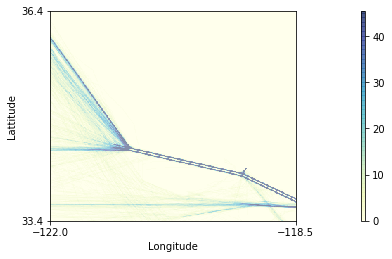

In [16]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.15, 0.83, 0.73])
ax2 = fig.add_axes([0.95, 0.15, 0.01, 0.73])
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Lattitude')

ax1.set_xticks([lonMin,lonMax])
ax1.set_yticks([latMin,latMax])

def animate(i):
    tempHMDisp = np.flip(seasonalHM[i],axis=0)
    iMShowHandler = ax1.imshow(tempHMDisp, cmap=plt.get_cmap('YlGnBu'),extent=[lonMin,lonMax,latMin,latMax],alpha = 0.5, vmax = maxSeasonalVal/10)
    fig.colorbar(iMShowHandler,ax2)
    
anim = animation.FuncAnimation(fig, animate,frames=12, interval=1000)

In [17]:
HTML(anim.to_html5_video())